In [9]:
import torch
from torch.autograd import Variable
import torch.nn as nn
from os.path import basename
from os.path import join
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from utility.utility import load_images
from utility.vgg_network_with_top import VGG as VGGWithTOP

f = 'output/265/[1020].jpg'
img = load_images(f, 256, 'cuda:0', 1)
# print(img)
# vgg_with_top = VGGWithTOP()
# vgg_with_top.load_state_dict(torch.load('./vgg_with_top.pth'))
from torchvision import models
vgg_with_top = models.resnet18(weights=None)
vgg_with_top.fc = nn.Linear(512, 26)
vgg_with_top.load_state_dict(torch.load('./resnet_0_1.pth'))

for param in vgg_with_top.parameters():
    param.requires_grad = False
vgg_with_top.to('cuda:0')
vgg_with_top.eval()

content_class = 'A'
label = torch.tensor([i for i in range(26) if chr(i+ord('A')) == content_class]).to('cuda:0')
# logit = vgg_with_top(img, ['fc3'])[0]
logit = vgg_with_top(img)
# print(logit)
prob = nn.Softmax(dim=1)(logit)
print(prob)
pred_label = torch.max(prob, 1)[1].item()
print('class', chr(ord('A') + pred_label))
loss = nn.CrossEntropyLoss()(logit, label)
print(loss)


tensor([[1.5791e-09, 2.1640e-08, 2.5100e-08, 6.6962e-09, 3.2617e-07, 1.8972e-11,
         7.3669e-08, 1.9988e-08, 4.7147e-03, 9.0731e-08, 3.3016e-08, 9.9518e-01,
         8.4838e-13, 1.5790e-09, 5.2730e-12, 5.4941e-11, 6.6949e-08, 1.9095e-09,
         2.8374e-08, 1.0302e-09, 2.6120e-09, 2.1241e-09, 6.2753e-14, 3.7070e-09,
         5.2187e-08, 1.0815e-04]], device='cuda:0')
class L
tensor(20.2664, device='cuda:0')


In [63]:
from train_vgg import make_dataloader

d = make_dataloader()
print(d['test'].dataset[0][0][0][100:120,100:120])

TRAIN SIZE:  41990
VAL SIZE:  13624
TEST SIZE:  25714
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.1608, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.5412, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0157, 0.9059, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.3020, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.6863, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000],
      

In [2]:
from train_vgg import make_path_list, make_dataloader

# t, _, _ = make_path_list()
# print(t[:10])
d = make_dataloader('cpu')
plt.figure(figsize =(10, 10))
for i, l in d['train']:
    for _i, _l in zip(i, l): 
        plt.subplot(4, 7, _l.item()+1)
        plt.imshow(_i[0], cmap='gray')

plt.figure(figsize =(10, 10))
for i, l in d['val']:
    for _i, _l in zip(i, l): 
        plt.subplot(4, 7, _l.item()+1)
        plt.imshow(_i[0], cmap='gray')

TRAIN SIZE:  41990
VAL SIZE:  13624
TEST SIZE:  25714


TypeError: 'int' object is not callable

<Figure size 720x720 with 0 Axes>

In [2]:
from utility.vgg_network_with_top import VGG, Model
from train_vgg import make_path_list, make_dataloader

d = make_dataloader('cpu')
vgg = VGG(26)
vgg.eval()

# vgg2 = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19', init_weights=False)
# vgg2.features[0] = nn.Conv2d(1, 64, kernel_size=3, padding=1)
# vgg2.avgpool = nn.AdaptiveAvgPool2d((8, 8))
# vgg2.classifier[0] = nn.Linear(512*8*8, 4096)
# vgg2.classifier[6] = nn.Linear(4096, 26)
# vgg2.eval()

# m = Model()
# m.eval()

i = torch.randn(10, 1, 256, 256)
print('i', i)
with torch.no_grad():
    print('out1', vgg(i, ['fc3']))
    print('out2', vgg2(i))

for i, l in d['train']:
    o1 = vgg(i, ['fc3'])
    # o2 = vgg2(i)
    break

print(o1)
# print(o2)

TRAIN SIZE:  41990
VAL SIZE:  13624
TEST SIZE:  25714
i tensor([[[[-0.5423,  0.3065, -0.3376,  ..., -0.4974,  0.8768, -0.1035],
          [ 0.5822, -1.0294,  0.9340,  ..., -0.1026, -0.9206, -0.1713],
          [ 0.6879, -2.0340,  0.6456,  ..., -0.3766, -0.7715,  0.8524],
          ...,
          [ 1.7260,  1.2476, -0.6634,  ..., -2.3865,  0.3136,  0.0300],
          [-0.4887, -0.4332,  0.0106,  ...,  0.6427, -0.3805, -0.1196],
          [-0.0113,  0.9679, -2.3826,  ..., -1.8271,  0.2571,  0.6796]]],


        [[[-0.5027, -1.1181,  1.0078,  ..., -0.8235,  0.5323, -1.1458],
          [-1.0572,  1.1472,  0.2468,  ...,  1.1336,  0.1664, -0.9696],
          [-0.9418, -0.1571, -0.3978,  ...,  1.3375,  0.2424,  0.0682],
          ...,
          [-0.9631, -1.0917,  1.7891,  ..., -1.3390,  0.6551,  1.1878],
          [-0.2230,  0.2640, -0.2684,  ..., -0.8585, -0.1678, -1.2309],
          [-1.1352,  0.5258,  0.1004,  ...,  2.0580,  0.0970, -0.8208]]],


        [[[-1.6625,  0.9490,  1.8656,  ...

RuntimeError: Given groups=1, weight of size [64, 3, 3, 3], expected input[10, 1, 256, 256] to have 3 channels, but got 1 channels instead

In [16]:
a = torch.unsqueeze(torch.tensor(0), dim=0)
print(a.shape)

torch.Size([1])


In [2]:
from torchvision import transforms
from utility.utility import load_images, max_min_scale

f = '../font2img/image/Abel-Regular/D.png'
# f = '/home/tetta/Pictures/tetta_kondo.JPG'
i = load_images(f, 256, 'cpu', 1)

# print(i.shape)
# print(i[0][0][0:5, 0:5])
# print(i[0][0][100:120, 80:90])
# plt.imshow(i[0].permute(1,2,0))
# print(i.dtype)

prep = transforms.Compose([
                        # transforms.Resize((256,256)),
                        # transforms.RandomRotation(angle),
                        # transforms.ToTensor(),
                        # transforms.Lambda(lambda x: x[torch.LongTensor([2,1,0])]), #turn to BGR
                        transforms.Normalize(mean=[0.40760392, 0.45795686, 0.48501961], #subtract imagenet mean
                                                std=[1,1,1]),
                        transforms.Lambda(lambda x: x.mul_(255)),
                        ])

print(i.min())
print(i.max())

# i = max_min_scale(i)
prep(i)
print(i.min())
print(i.max())
# plt.imshow(i[0].permute(1,2,0))



tensor(-123.6800)
tensor(151.0610)


TypeError: img should be Tensor Image. Got <class 'NoneType'>

In [2]:
from utility.vgg_network_with_top import VGG
import torch

vgg = VGG(26)
# i = torch.ones(12, 1, 256, 256)
i = torch.randn(2, 1, 256, 256)
o = vgg(i, ['fc3'])[0]
print('logits', o)
m = nn.Softmax(dim=1)
pred = m(o)
print('pred', pred)


from torchvision import models
from torch import nn
vgg2 = models.vgg19()
vgg2.features[0] = nn.Conv2d(1, 64, kernel_size=3, padding=1)
vgg2.avgpool = nn.AdaptiveAvgPool2d((8, 8))
vgg2.classifier[0] = nn.Linear(512*8*8, 4096)
vgg2.classifier[6] = nn.Linear(4096, 26)

o2 = vgg2(i)
print('logits', o2)
pred2 = m(o2)
print('pred', pred2)


logits tensor([[-0.1058,  0.1741, -0.0923, -0.0151, -0.2229, -0.2300, -0.0282, -0.0360,
          0.0891,  0.0046,  0.2404, -0.0240, -0.0099,  0.0192,  0.0455,  0.1102,
         -0.0802,  0.0678, -0.0605, -0.0148,  0.0418, -0.0833, -0.0018,  0.1328,
          0.0070, -0.1701],
        [-0.1210,  0.0962,  0.0478, -0.1091, -0.1825, -0.2050, -0.0410, -0.0358,
         -0.0169, -0.1034,  0.1817,  0.0946, -0.0660, -0.1040, -0.1219, -0.0929,
         -0.0100,  0.1631, -0.1130, -0.0129,  0.1019, -0.0275, -0.1003, -0.0932,
          0.0661, -0.1777]], grad_fn=<AddmmBackward0>)
pred tensor([[0.0347, 0.0459, 0.0352, 0.0380, 0.0309, 0.0307, 0.0375, 0.0372, 0.0422,
         0.0388, 0.0491, 0.0377, 0.0382, 0.0393, 0.0404, 0.0431, 0.0356, 0.0413,
         0.0363, 0.0380, 0.0402, 0.0355, 0.0385, 0.0441, 0.0389, 0.0326],
        [0.0352, 0.0437, 0.0417, 0.0356, 0.0331, 0.0324, 0.0381, 0.0383, 0.0391,
         0.0358, 0.0476, 0.0437, 0.0372, 0.0358, 0.0352, 0.0362, 0.0393, 0.0468,
         0.0355, 0.03

In [ ]:
from torchvision import datasets, transforms
transform = transforms.Compose([
    transforms.ToTensor()
    ])
train_dataset = datasets.MNIST(
    './data',               # データの保存先
    train = True,           # 学習用データを取得する
    download = True,        # データが無い時にダウンロードする
    transform = transform   # テンソルへの変換など
    )
# 評価用
test_dataset = datasets.MNIST(
    './data', 
    train = False,
    transform = transform
    )

# データローダー
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = 128,
    shuffle = True)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,     
    batch_size = 128,
    shuffle = True)

In [17]:
vgg2 = VGG(26)
vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19', init_weights=False)
# vgg.features[0] = nn.Conv2d(1, 64, kernel_size=3, padding=1)
# vgg.avgpool = nn.AdaptiveAvgPool2d((8, 8))
# vgg.classifier[0] = nn.Linear(512*8*8, 4096)
# vgg.classifier[6] = nn.Linear(4096, 26)

print(vgg2)
print(vgg)

Using cache found in /home/tetta/.cache/torch/hub/pytorch_vision_v0.10.0


VGG(
  (conv1_1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_4): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_1): Conv2d(512, 512,

In [ ]:
BASE_DIR = '../font2img'
FONT_IMAGE_DIR = 'image'
FONT_CSV = 'google_font_category_v4.csv'

font_df = pd.read_csv(join(BASE_DIR, FONT_CSV))
print(font_df.head())

train_mask = font_df['data_type'] == 'train'
valid_mask = font_df['data_type'] == 'valid'
test_mask = ~(train_mask | valid_mask)

train_df = font_df[train_mask]
valid_df = font_df[valid_mask]
test_df = font_df[test_mask]

print('all ', len(font_df))
print('train ', len(train_df))
print('valid ', len(valid_df))
print('test ', len(test_df))

train_paths = []
for _, line in train_df.iterrows():
    train_paths += [line['font']+s for s in eval(line['subsets'])]

valid_paths = []
print(type(test_df))
for _, line in valid_df.iterrows():
    valid_paths += [line['font']+s for s in eval(line['subsets'])]

test_paths = []
for _, line in test_df.iterrows():
    test_paths += [line['font']+s for s in eval(line['subsets'])]

print(len(train_paths))
print(len(valid_paths))
print(len(test_paths))

# style1_dir_list = glob(join(BASE_DIR, FONT_IMAGE_DIR, 'serif', '*', '*-Regular'))
# print(style1_dir_list)

# style2_dir_list = glob(join(BASE_DIR, FONT_IMAGE_DIR, 'sanserif', '*', '*-Regular'))
# print(style1_dir_list)

In [ ]:
print(font_df[font_df['font'] == 'yujimai']['data_type'] == '-')
if (font_df[font_df['font'] == 'yujimai']['data_type'] == '-').item():
    print((font_df[font_df['font'] == 'yujimai']['data_type'] == 'f').item())

In [ ]:
OUTPUT_FILE = 'data.csv'

font_dict = {'dirname': [], 'type': []}
font_dir_path = [basename(p) for p in  glob(join(BASE_DIR, FONT_IMAGE_DIR, '*'))]
empty_cnt = 0
type_list = ['train', 'valid', 'test', 'train', 'test']
for p in font_dir_path:
    fontname = p.split('-')[0].split('[')[0].lower()
    line = font_df[font_df['font'] == fontname]
    if line.empty:
        data_type = type_list[empty_cnt % len(type_list)]
        empty_cnt += 1
        font_dict['dirname'] += [p]
        font_dict['type'] += [data_type]
    else:
        data_type = line['data_type'].item()
        data_type = data_type if data_type != '-' else 'test'
        font_dict['dirname'] += [p]
        font_dict['type'] += [data_type]     

data_path_df = pd.DataFrame(font_dict)
data_path_df.to_csv(OUTPUT_FILE, index=False)
# print(font_df.head())


# t = [basename(p).split('-')[0].split('[')[0].lower() for p in glob(join(BASE_DIR, FONT_IMAGE_DIR, '*'))]
# fontname = set(t)

# for f in fontname:
#     if f not in font_df['font'].values:
#         print(f)

In [ ]:
data_path_df = pd.read_csv(OUTPUT_FILE)

train_path_df = data_path_df[data_path_df['type'] == 'train']
valid_path_df = data_path_df[data_path_df['type'] == 'valid']
test_path_df = data_path_df[data_path_df['type'] == 'test']

print(len(data_path_df))
print(len(train_path_df))
print(len(valid_path_df))
print(len(test_path_df))

In [ ]:
i = torch.ones(1, 3, 4, 4)
b,c,h,w = i.size()
Fe = i.view(b, c, h*w)
print('Fe shape: ', Fe.shape)
print('Fe: ', Fe)
print('Fe trans shape: ', Fe.transpose(1,2).shape)
G = torch.bmm(Fe, Fe.transpose(1,2))
print('G shape: ', G.shape)
print('G before div: ', G)
G = G.div(c*h*w)
print('G after div: ', G)
print(G)

In [ ]:
input = torch.ones(1,3,4,4)

a, b, c, d = input.size()  # a=batch size(=1)
# b=number of feature maps
# (c,d)=dimensions of a f. map (N=c*d)

features = input.view(a * b, c * d)  # resise F_XL into \hat F_XL
print('features shape: ', features.shape)
print('features: ', features)

G = torch.mm(features, features.t())  # compute the gram product

print('G shape: ', G.shape)
print('G: ', G)
print('G div: ', G.div(a*b*c*d))

In [ ]:
a = []
a += [1]
print(a)
a += [2,3,4,5,6,7]
print(a[::2])

In [56]:
mean = [0.485, 0.456, 0.406]
print(torch.tensor(mean).view(-1, 1, 1).shape)

torch.Size([3, 1, 1])


In [78]:
from torchvision import models
from torch import nn
from collections import OrderedDict
vgg = models.vgg19(weights='IMAGENET1K_V1').features
# vgg.features[0] = nn.Conv2d(1, 64, kernel_size=3, padding=1)
# print(vgg)
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        self.mean = torch.tensor(mean).view(-1, 1, 1)
        self.std = torch.tensor(std).view(-1, 1, 1)

    def forward(self, img):
        # normalize img
        return (img - self.mean) / self.std

device = 'cuda:0'
cnn_normalization_mean = [0.485, 0.456, 0.406]
cnn_normalization_std = [0.229, 0.224, 0.225]

normalization = Normalization(cnn_normalization_mean, cnn_normalization_std).to(device)
model = nn.Sequential(normalization)
# class VGG(nn.Module):
#     def __init__(self, pool='max'):
#         super(VGG, self).__init__()
# layers = OrderedDict()
# layers['prep'] = normalization
i = 0  # increment every time we see a conv
for layer in vgg.children():
    if isinstance(layer, nn.Conv2d):
        i += 1
        name = 'conv_{}'.format(i)
    elif isinstance(layer, nn.ReLU):
        name = 'relu_{}'.format(i)
        # The in-place version doesn't play very nicely with the ContentLoss
        # and StyleLoss we insert below. So we replace with out-of-place
        # ones here.
        layer = nn.ReLU(inplace=False)
    elif isinstance(layer, nn.MaxPool2d):
        name = 'pool_{}'.format(i)
    elif isinstance(layer, nn.BatchNorm2d):
        name = 'bn_{}'.format(i)
    else:
        raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))
    
    # layers[name] = layer
    model.add_module(name, layer)
    
model.to(device)
torch.save(model.state_dict(), 'vgg_conv_0_1.pth')
    
# for k, v in layers.items():
#     print(k, v)

In [4]:
import torch
model_weights = torch.load('vgg_conv_0_1.pth', map_location={'cuda': 'cpu'})

from utility.vgg_network import VGG

vgg = VGG()
vgg.load_state_dict(model_weights)

<All keys matched successfully>

In [5]:
from utility.vgg_network_with_top import VGG
v = VGG(26)
print(v)

VGG(
  (conv1_1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_4): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_1): Conv2d(512, 512,

In [11]:
from torchvision import models
from torch import nn
import torch

i = torch.randn(8, 1, 256, 256)
vgg = models.resnet18(pretrained=False)
vgg.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
vgg.fc = nn.Linear(512,26)
o = vgg(i)
print(vgg)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2):

In [1]:
from train_vgg import make_dataloader
import matplotlib.pyplot as plt

d = make_dataloader('cpu')

/home/tetta/.local/share/virtualenvs/research-vbjgNxHm/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TRAIN SIZE:  41990
VAL SIZE:  13624
TEST SIZE:  25714


In [4]:
print(d['train'].dataset[0][0].max())
print(d['train'].dataset[0][0].min())

# plt.imshow(d['train'].dataset[0][0].permute(1,2,0))

tensor(151.0610)
tensor(-123.6800)


In [5]:
import torch
import torch.nn as nn
from torchvision import models
from collections import OrderedDict

vgg = models.resnet18(pretrained=False)
vgg.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
vgg.fc = nn.Linear(512, 26)


model_path = 'resnet18.pth'
model_weights = torch.load(model_path, map_location={'cuda': 'cpu'})

vgg.load_state_dict(model_weights)

from train_vgg import make_dataloader
import matplotlib.pyplot as plt

d = make_dataloader('cpu')['train']

/home/tetta/.local/share/virtualenvs/research-vbjgNxHm/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/tetta/.local/share/virtualenvs/research-vbjgNxHm/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


TRAIN SIZE:  41990
VAL SIZE:  13624
TEST SIZE:  25714


In [10]:
for param in vgg.parameters():
    param.requires_grad = False
vgg.eval()

from utility.utility import load_mono_images

f = '../font2img/image/Abel-Regular/D.png'
i = load_mono_images(f, 256, 'cpu', 1)
i = i.unsqueeze(0)
o = vgg(i)
# print(i[0][0][100:120, 100:120])
print(vgg)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2):

In [16]:
from torchvision import models

for n, m in vgg.named_children():
    print(n, m)

conv1 Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
bn1 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
relu ReLU(inplace=True)
maxpool MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
layer1 Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), paddin

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


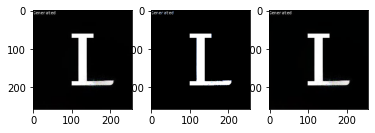

In [30]:
from torchvision import transforms
from utility.utility import load_images

f = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

f_inv = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225], std=[1/0.229, 1/0.224, 1/0.225])

img_path = 'output/265/[1020].jpg'
img = load_images(img_path, 256, 'cpu', 1)
plt.subplot(131)
plt.imshow(img[0].permute(1,2,0))

f_img = f(img)
plt.subplot(132)
plt.imshow(f_img[0].permute(1,2,0))

f_invimg = f_inv(f_img)
plt.subplot(133)
plt.imshow(f_invimg[0].permute(1,2,0))


In [21]:
img

tensor([[[[-2.0837, -2.0323, -1.9467,  ..., -2.0837, -2.0837, -2.0837],
          [-2.1179, -2.1179, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
          [-1.8097, -2.1179, -2.1179,  ..., -2.0837, -2.0837, -2.0837],
          ...,
          [-2.0494, -2.0494, -2.0494,  ..., -2.0837, -2.0494, -2.0494],
          [-2.0494, -2.0494, -2.0494,  ..., -2.0665, -2.0494, -2.0323],
          [-2.0494, -2.0494, -2.0494,  ..., -2.0665, -2.0494, -2.0323]],

         [[-2.0007, -1.9482, -1.8606,  ..., -2.0007, -2.0007, -2.0007],
          [-2.0357, -2.0357, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
          [-1.7206, -2.0357, -2.0357,  ..., -2.0007, -2.0007, -2.0007],
          ...,
          [-1.9657, -1.9657, -1.9657,  ..., -2.0007, -1.9657, -1.9657],
          [-1.9657, -1.9657, -1.9657,  ..., -1.9832, -1.9657, -1.9482],
          [-1.9657, -1.9657, -1.9657,  ..., -1.9832, -1.9657, -1.9482]],

         [[-1.7696, -1.7173, -1.6302,  ..., -1.7696, -1.7696, -1.7696],
          [-1.8044, -1.8044, -